In [71]:
import numpy as np  #Importing the required libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [72]:
df=pd.read_csv('salaries.csv')   #Importing the dataset
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


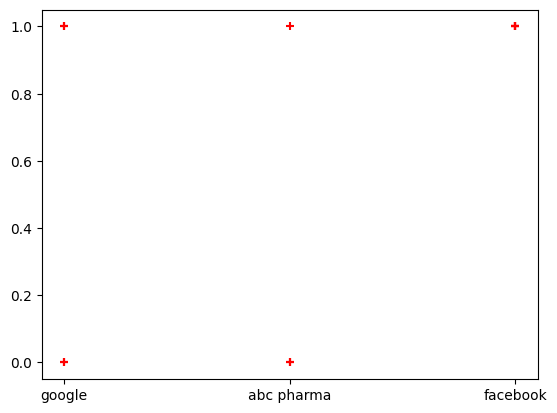

In [73]:
from matplotlib import pyplot as plt  
plt.scatter(df['company'],df['salary_more_then_100k'],marker='+',color='red')

In [74]:
df1=df.drop(columns=['salary_more_then_100k'])   #Dropping the column "salary_more_then_100k"
newdf=pd.get_dummies(df1,dtype=int) #Creating dummies for the unique values in the column 'company' ,'job' and 'degree'
newdf

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,1
6,1,0,0,0,0,1,0,1
7,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,1


In [75]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression
X=newdf
Y=df[['salary_more_then_100k']]

In [76]:
model=LogisticRegression() #Assigning a varible named 'model' to the imported Logistic Regression to access the logistic regression

In [77]:
model.fit(X,Y)  #Fitting the X and Y values

LogisticRegression()

In [78]:
salary=model.predict([[0,1,0,1,0,0,0,1]])  #Here we are predicting the salary by entering the inputs
salary 

array([1], dtype=int64)

In [79]:
model.score(X,Y) #Accuracy of the model before implementing train and test mode

0.9375

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(newdf,df[['salary_more_then_100k']],test_size=0.33)

In [81]:
modeltraintest=LogisticRegression()
modeltraintest.fit(X_train,Y_train)

LogisticRegression()

In [82]:
traintestans=modeltraintest.predict(X_train)
traintestans

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [83]:
modeltraintest.score(X_train,Y_train)  #Accuracy after train and test model

1.0